In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

### Pressure Sensor Calibration

Equation of line is : y =  33.511598 x  -12.40394


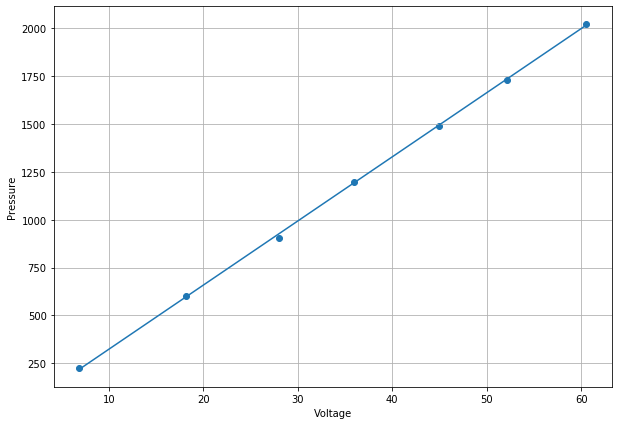

In [48]:
V=[6.8556,18.1895,28.0325,35.9334,44.9915,52.1227,60.5359] # Voltage
Dh=np.array([1.7,4.5,6.8,9,11.2,13,15.2]) # hieght difference
P = Dh*13.593*9.8 # Converting to pressure

m=33.511598 # slope of best fit line
c=-12.40394 # intercept of best fit line
print('Equation of line is : y = ',m,'x ',c)

fig=plt.figure(figsize=(10,7))
plt.scatter(V,P)
plt.plot(np.unique(V), np.poly1d(np.polyfit(V, P, 1))(np.unique(V)))
plt.xlabel('Voltage')
plt.ylabel('Pressure')
plt.grid()
fig.savefig("best_fit.png", bbox_inches='tight', dpi=600)

### Velocity Profile

C:\Users\aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt
C:\Users\aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


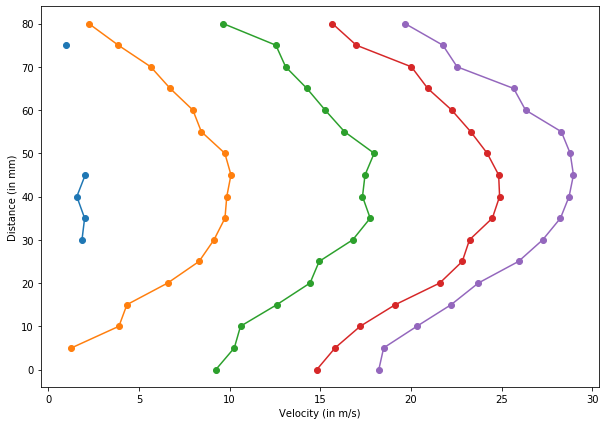

In [49]:
# observation points
x=np.arange(0,85,5)
# Voltages at 5 different conditions
y1=np.array([0.237371294, 0.043671671,0.060824178,0.1933555,0.203550217,0.364117009,0.432931349,0.443126066,0.415090594,0.445674745,0.364117009,0.236683047,0.063372858,0.053866388,0.242468652,0.387743369,0.275601482])
y2=np.array([0.338630217,0.399798519,0.647020406,0.713286067,1.161853615,1.633359276,1.895873239,2.104864937,2.140546447,2.224652862,2.102316258,1.671589465,1.531412106,1.194986445,0.952861916,0.641923048,0.460966821])
y3=np.array([2.069183428,3.24922192,3.501541166,4.087737394,4.630606074,5.247386452,6.27450419,5.948273246,5.859069472,6.131778152,5.52519249,4.449649847,4.179489847,3.274708713,2.423449843,2.293467202,1.931554748])
y3=y3[::-1]
y4=np.array([4.380835507,4.944093621,5.780060415,7.067143437,8.89199778,9.901274763,10.23770042,11.33618118,11.69809363,11.64966873,11.08386193,10.29122269,9.419574385,8.377164571,7.70176457,5.644980415,4.857438527])
y5=np.array([7.446896645,9.02707778,9.664247593,12.4142725,13.03615024,15.00882798,15.51856383,15.70971477,15.45484685,14.96040307,13.96641817,12.66914043,10.65568382,9.396636271,7.926048344,6.623673247,6.4452657])
y5=y5[::-1]

# convert Voltage to Pressure
y1 = (m*y1 + c)
y2 = (m*y2 + c)
y3 = (m*y3 + c)
y4 = (m*y4 + c)
y5 = (m*y5 + c)

# convert Pressure to Velocity
rho=1.225
y1 = np.sqrt(2*(y1)/rho)
y2 = np.sqrt(2*(y2)/rho)
y3 = np.sqrt(2*(y3)/rho)
y4 = np.sqrt(2*(y4)/rho)
y5 = np.sqrt(2*(y5)/rho)

fig=plt.figure(figsize=(10,7))
plt.plot(y1,x,marker='o')
plt.plot(y2,x,marker='o')
plt.plot(y3,x,marker='o')
plt.plot(y4,x,marker='o')
plt.plot(y5,x,marker='o')
plt.xlabel('Velocity (in m/s)')
plt.ylabel('Distance (in mm)')

y1 = y1[~np.isnan(y1)]
y2 = y2[~np.isnan(y2)]

# Mean Velocity for each condition
v1=np.mean(y1)
v2=np.mean(y2)
v3=np.mean(y3)
v4=np.mean(y4)
v5=np.mean(y5)

# theoretical mass flow rate for each condition
mt1=rho*A*v1
mt2=rho*A*v2
mt3=rho*A*v3
mt4=rho*A*v4
mt5=rho*A*v5
# print(v1,v2,v3,v4,v5)
fig.savefig("vel_profile.png", bbox_inches='tight', dpi=600)

In [50]:
# hieght differences for orifice, nozzle and venturimeter for different conditions
orf=np.array([0.12,0.24,0.6,1.4,2])
noz=np.array([1.5,3,8.1,15,19.9])
ven=np.array([2.3,4.6,12.3,22.7,30.8])

# converting to Pressure
orf = 133.322*2*rho*orf # Mercury
noz = 9.80665*2*rho*noz # Water
ven = 9.80665*2*rho*ven # Water

# Areas
A=3.14159/4*(78**2)/1000000 # Outer area
A1=3.14159/4*(50**2)/1000000 # Orifice area
A2=3.14159/4*(48**2)/1000000 # Nozzle area
A3=3.14159/4*(43.4**2)/1000000 # Venturimeter area

# Calculating experimental mass flow rate for orifice, nozzle and venturimeter
a1=(1/A1)**2 - (1/A)**2
a2=(1/A2)**2 - (1/A)**2
a3=(1/A3)**2 - (1/A)**2
m1=np.sqrt(orf/a1)
m2=np.sqrt(noz/a2)
m3=np.sqrt(ven/a3)

# Calculating Coefficient of discharge for orifice, nozzle and venturimeter
cd1=m1/mt1
cd2=m2/mt2
cd3=m3/mt3
print(cd1)
print(cd2)
print(cd3)

[1.36556226 1.93119667 3.05349005 4.66428309 5.5748846 ]
[0.29766908 0.42096765 0.69172044 0.94131229 1.08421306]
[0.13963074 0.19746769 0.32290122 0.43866204 0.51096657]


### Plotting Cd and Pressure Drop vs Mass Flow Rate

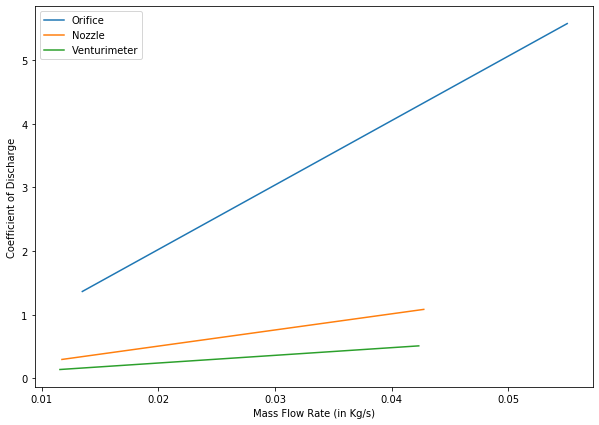

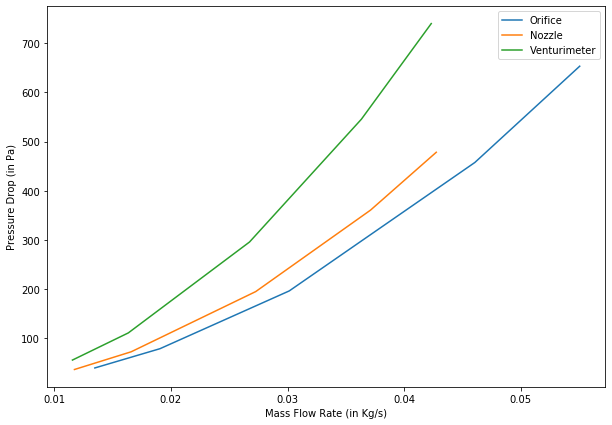

In [51]:
fig1=plt.figure(figsize=(10,7))
l1,=plt.plot(m1,cd1)
l2,=plt.plot(m2,cd2)
l3,=plt.plot(m3,cd3)
plt.xlabel('Mass Flow Rate (in Kg/s)')
plt.ylabel('Coefficient of Discharge')
plt.legend((l1, l2, l3), ('Orifice', 'Nozzle', 'Venturimeter'))
fig1.savefig("cd_vs_m_dot.png", bbox_inches='tight', dpi=600)

fig2=plt.figure(figsize=(10,7))
line1,=plt.plot(m1,orf)
line2,=plt.plot(m2,noz)
line3,=plt.plot(m3,ven)
plt.xlabel('Mass Flow Rate (in Kg/s)')
plt.ylabel('Pressure Drop (in Pa)')
plt.legend((line1, line2, line3), ('Orifice', 'Nozzle', 'Venturimeter'))
fig2.savefig("press_drop_vs_m_dot.png", bbox_inches='tight', dpi=600)

### Error Analysis

In [52]:
# mean of Cd for orifice, nozzle and venturimeter
mean1=np.mean(cd1)
mean2=np.mean(cd2)
mean3=np.mean(cd3)

# variance of Cd for orifice, nozzle and venturimeter
var1=np.var(cd1)
var2=np.var(cd2)
var3=np.var(cd3)

# standard deviation of Cd for orifice, nozzle and venturimeter
dev1=np.std(cd1)
dev2=np.std(cd2)
dev3=np.std(cd3)

print(mean1,mean2,mean3)
print(var1,var2,var3)
print(dev1,dev2,dev3)

3.317883335205895 0.6871765039780888 0.3219256503260022
2.5422416555273593 0.08896537161283577 0.019617204482595692
1.5944408598400128 0.2982706348483467 0.14006143110291175
